In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.stats
from scipy.stats import binom, geom
from jupyterthemes import jtplot
jtplot.style()

## Параметры
(вариант 4)

Геометрическое – G(p), p = 0.3;

Биномиальное – Bi(m,p), m = 4, p = 0.2.

## Основное задание
1) Осуществить моделирование n = 1000 реализаций СВ из заданных дискретных распределений
для этого можно использовать любой генератор БСВ (как реализованный в 1-ой лабораторной
работе, так и встроенный в язык программирования). Вывести на экран несмещенные оценки
математического ожидания и дисперсии, сравнить их с истинными значениями.

In [2]:
p = 0.3
print(f'Geometric distribution (p = {p})')
true_mean, true_var = 1/p, (1-p)/p**2
a = np.random.geometric(p, size=1000)
mean = np.mean(a)
var = np.var(a, ddof=1)
print(f'Mean: {mean:.3f}\nVariance: {var:.3f}')
print(f'True mean: {true_mean:.3f}\nTrue variance: {true_var:.3f}')

Geometric distribution (p = 0.3)
Mean: 3.066
Variance: 6.520
True mean: 3.333
True variance: 7.778


In [3]:
m = 4
q = 0.2
print(f'Binomial distribution (m = {m}, p = {q})')
true_mean, true_var = m*q, m*q*(1-q)
b = np.random.binomial(m, q, size=1000)
mean = np.mean(b)
var = np.var(b, ddof=1)
print(f'Mean: {mean:.3f}\nVariance: {var:.3f}')
print(f'True mean: {true_mean:.3f}\nTrue variance: {true_var:.3f}')

Binomial distribution (m = 4, p = 0.2)
Mean: 0.816
Variance: 0.641
True mean: 0.800
True variance: 0.640


## Дополнительные задания
Для каждой из сгенерированных последовательностей:

1) Вычислить несмещенные оценки коэффициентов эксцесса и асимметрии и сравнить с
истинными значениями.

2) Построить гистограмму и сравнить с графиком теоретического распределения
вероятностей (на одном графике).

In [65]:
def plot_hist_pmf(a, pmf, *params):
    minimum = a.min()
    maximum = a.max()
    plt.hist(a,bins=np.linspace(minimum-0.5,maximum+0.5,num=maximum+2))
    x = np.arange(minimum, maximum+1)
    f = len(a)*pmf(x, *params)
    plt.scatter(x, f, c = 'red', zorder=100)
    #plt.vlines(x, 0, f, colors='red', lw=2, alpha=0.5)
    plt.legend(['theoretical', 'empirical'])
    plt.show()
    
def plot_hist_cmf(a, cdf, *params):
    minimum = a.min()
    maximum = a.max()
    x = np.arange(minimum, maximum+1)
    values, base = np.histogram(a,maximum)
    cumulative = np.cumsum(values)/len(a)
    plt.scatter(base[:-1], cumulative)
    f = cdf(x, *params)
    plt.scatter(x, f, c = 'red', zorder=100)
    #plt.hlines(cumulative, base[:-2], base[1:-1], colors='cyan', lw=2, alpha=0.5)
    #plt.hlines(f, x[:-1], x[1:], colors='red', lw=2, alpha=0.5)
    plt.legend(['theoretical', 'empirical'], loc='lower right')
    plt.show()

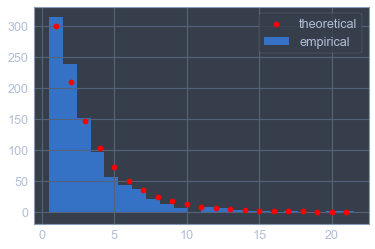

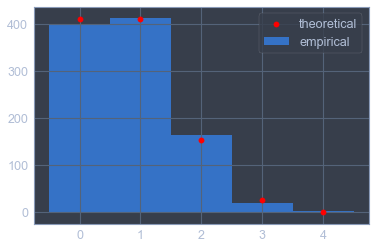

In [51]:
plot_hist_pmf(a, geom.pmf, p)
plot_hist_pmf(b, binom.pmf, m, q)

3) Построить график эмпирической функции распределения и сравнить с графиком
теоретической функции распределения.

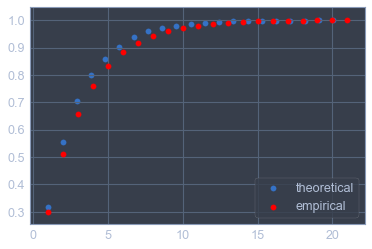

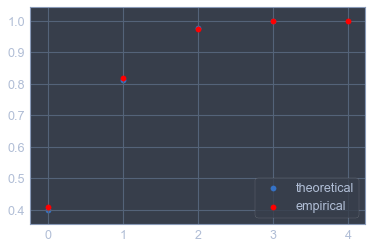

In [66]:
plot_hist_cmf(a, geom.cdf, p)
plot_hist_cmf(b, binom.cdf, m, q)

4) Реализовать критерий хи-квадрат Пирсона проверки статистической гипотезы о
принадлежности смоделированной последовательности к заданному распределению.